# SIMULE EL PRIMER SISTEMA CUÁNTICO NUEVO DESCRITO EN LA SECCIÓN 4.1.
## El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.
### 1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.
### RTA:


In [1]:
import numpy as np
from sys import stdin

vector = np.array([1, 2, 34, 5, 6])
posicion = 0

numerador = np.abs(vector[posicion]) ** 2
denominador = np.linalg.norm(vector) ** 2

if denominador == 0:
    raise ValueError("Error: División entre cero detectada")

probabilidad = (numerador / denominador).item()

print("Punto 1:\nLa probabilidad en la posición", posicion, "es:", probabilidad, "%")


Punto 1:
La probabilidad en la posición 0 es: 0.0008183306055646482 %


### 2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.
### RTA:

In [2]:
import numpy as np

array_x = np.array([1, 2, 3, 4, 5, 6])
posicion_objetivo = 2

array_y = np.array([(0 if j != posicion_objetivo else array_x[j].item()) for j in range(len(array_x))])
print("Punto 2:\nPrimer vector:", array_x, "\nSegundo vector:", array_y)

array_x = array_x / np.linalg.norm(array_x)
array_y = array_y / np.linalg.norm(array_y)

dot_product = np.vdot(array_y, array_x)
transicion_prob = (np.abs(dot_product)) ** 2
resultado_final = transicion_prob.item()

print("La probabilidad de transitar del primer vector al segundo es de:", resultado_final, "%")


Punto 2:
Primer vector: [1 2 3 4 5 6] 
Segundo vector: [0 0 3 0 0 0]
La probabilidad de transitar del primer vector al segundo es de: 0.0989010989010989 %


# COMPLETE LOS RETOS DE PROGRAMACIÓN DEL CAPÍTULO 4.
### 1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación
### RTA:

In [3]:
import numpy as np

vec_origen = np.array([1, 0, 0])  
vec_destino = np.array([0, 0, 1]) 


amplitud_transicion = np.dot(vec_destino.conj(), vec_origen)


prob_transicion = np.abs(amplitud_transicion) ** 2

print("La probabilidad de transición es:", prob_transicion)


La probabilidad de transición es: 0


### 2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.
### RTA:

In [4]:
import numpy as np

def obtener_media_y_varianza(matriz, vector_estado):
    
    if not np.allclose(matriz, matriz.conj().T):
        return "La matriz proporcionada no es hermítica"

   
    promedio = np.dot(vector_estado.conj().T, np.dot(matriz, vector_estado)).real

    
    vector_transformado = np.dot(matriz, vector_estado)
    dispersion = np.dot(vector_estado.conj().T, np.dot(matriz, vector_transformado)).real - promedio ** 2

    return promedio, dispersion


matriz_observable = np.array([[1, 1j], [-1j, 2]])
vector_ket = np.array([np.sqrt(2)/2, np.sqrt(2)/2j])

promedio, dispersion = obtener_media_y_varianza(matriz_observable, vector_ket)

print("La media del observable es:", promedio.item())
print("La varianza del observable es:", dispersion.item())


La media del observable es: 2.5000000000000004
La varianza del observable es: 0.25


### 3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.
### RTA:

In [5]:
import numpy as np

def obtener_probabilidad_de_transicion(matriz_observable, vector_estado):
   
    autovalores, autovectores = np.linalg.eig(matriz_observable)

    
    prob_transiciones = np.abs(np.dot(autovectores.conj().T, vector_estado)) ** 2

    return autovalores, prob_transiciones

# Datos
matriz_observable = np.array([[1, 0], [0, -1]])  
vector_ket = np.array([[1], [0]]) 


autovalores, prob_transiciones = obtener_probabilidad_de_transicion(matriz_observable, vector_ket)

print("Autovalores del observable:", autovalores)
print("Probabilidades de transición hacia los autovectores:", prob_transiciones)


Autovalores del observable: [ 1. -1.]
Probabilidades de transición hacia los autovectores: [[1.]
 [0.]]


### 4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.
### RTA:

In [15]:
import numpy as np

def calcular_estado_final(estado_inicial, matrices_unitarias):
    estado_actual = estado_inicial
    for matriz_unitaria in matrices_unitarias:
        estado_actual = np.dot(matriz_unitaria, estado_actual)
    return estado_actual

# datos
estado_inicial = np.array([1, 0])  
matrices_unitarias = [np.array([[0, 1], [1, 0]]), 
                      np.array([[1, 0], [0, 1]])]

estado_final = calcular_estado_final(estado_inicial, matrices_unitarias)
print("El estado final del sistema es:", estado_final)


El estado final del sistema es: [0 1]


# REALICE LOS SIGUIENTES PROBLEMAS E INCLUYALOS COMO EJEMPLOS
### Modele en su librería los problemas:


#### 4.3.1
#### Find all the possible states the system described in Exercise 4.2.2 can transition into after a measurement has been carried out.
### RTA:

In [6]:
import numpy as np

def obtener_estado_final(vector_inicial, operadores_unitarios):
    vector_actual = vector_inicial
    for operador in operadores_unitarios:
        vector_actual = np.dot(operador, vector_actual)
    return vector_actual

# Datos
vector_inicial = np.array([1, 0])  
operadores_unitarios = [np.array([[0, 1], [1, 0]]), 
                        np.array([[1, 0], [0, 1]])]

vector_final = obtener_estado_final(vector_inicial, operadores_unitarios)
print("El estado final del sistema es:", vector_final)


El estado final del sistema es: [0 1]


#### 4.3.2

#### Perform the same calculations as in the last example, using Exercise 4.3.1. Then draw the probability distribution of the eigenvalues as in the previous example.
### RTA:

Probabilidad de transición en spin up: 0
Probabilidad de transición en spin down: 1


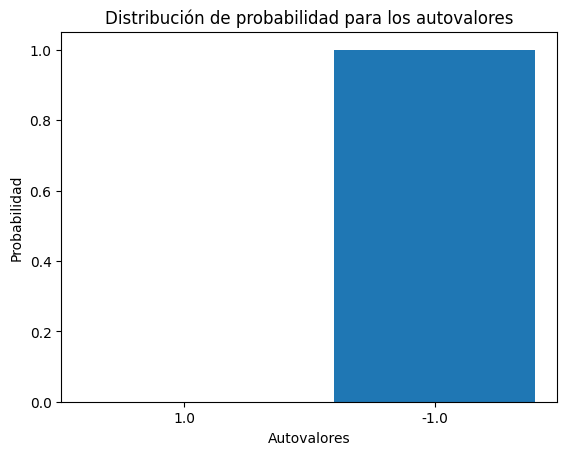

In [7]:
import numpy as np
import matplotlib.pyplot as plt


vector_inicial = np.array([1, 0])


operador_spin_y = np.array([[0, 1], [1, 0]])


vector_resultante = np.dot(operador_spin_y, vector_inicial)


prob_spin_up = abs(vector_resultante[0])**2
prob_spin_down = abs(vector_resultante[1])**2


print("Probabilidad de transición en spin up:", prob_spin_up)
print("Probabilidad de transición en spin down:", prob_spin_down)


autovalores, _ = np.linalg.eig(operador_spin_y)


plt.bar(np.arange(len(autovalores)), abs(vector_resultante) ** 2)
plt.xticks(np.arange(len(autovalores)), autovalores)
plt.xlabel('Autovalores')
plt.ylabel('Probabilidad')
plt.title('Distribución de probabilidad para los autovalores')
plt.show()




### Desarrolle e incluya en el Github una discusión de los ejercicios: 

### 4.4.1

### Verify that
$ U_1= \begin{pmatrix} 0 & 1 \\ 1 & 0 \\ \end{pmatrix}and...U_2= \begin{pmatrix}  \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} \\ \end{pmatrix} $

### are unitary matrices. Multiply them and verify that their product is also unitary.
### RTA:

In [8]:
import numpy as np


A = np.array([[0, 1], [1, 0]])
B = np.array([[np.sqrt(2) / 2, np.sqrt(2) / 2], [np.sqrt(2) / 2, -np.sqrt(2) / 2]])


es_unitaria_A = "es" if np.allclose(np.dot(A.conj().T, A), np.eye(2)) else "no es"


es_unitaria_B = "es" if np.allclose(np.dot(B.conj().T, B), np.eye(2)) else "no es"


producto_AB = np.dot(A, B)


es_unitario_producto = "es" if np.allclose(np.dot(producto_AB.conj().T, producto_AB), np.eye(2)) else "no es"


print("A", es_unitaria_A, "unitaria")
print("B", es_unitaria_B, "unitaria")
print("El producto de A y B", es_unitario_producto, "unitario")



A es unitaria
B es unitaria
El producto de A y B es unitario


### 4.4.2
#### Regresa al Ejemplo 3.3.2 (bola de billar cuántica), mantén el mismo vector de estado inicial [1, 0, 0, 0]T, pero cambia el mapa unitario a

\begin{pmatrix} 0 & \frac{1}{\sqrt{2}}   & \frac{1}{\sqrt{2}}  & 0 \\ 
\frac{i}{\sqrt{2}} & 0  & 0 & \frac{1}{\sqrt{2}} \\ 
\frac{1}{\sqrt{2}} & 0  & 0 & \frac{i}{\sqrt{2}} \\ 
0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 \\ 
\end{pmatrix}

#### Determina el estado del sistema después de tres pasos de tiempo. ¿Cuál es la probabilidad de que se encuentre la bola cuántica en el punto 3?

### RTA:

In [10]:
import numpy as np


transicion = np.array([
    [0, 1 / np.sqrt(2), 1 / np.sqrt(2), 0],
    [1j / np.sqrt(2), 0, 0, 1 / np.sqrt(2)],
    [1 / np.sqrt(2), 0, 0, 1j / np.sqrt(2)],
    [0, 1 / np.sqrt(2), -1 / np.sqrt(2), 0]
])


vector_inicial = np.array([1, 0, 0, 0])


vector_final = np.linalg.matrix_power(transicion, 3) @ vector_inicial


prob_en_punto_3 = np.abs(vector_final[2]) ** 2


print("El estado del sistema después de 3 tiempos es:", vector_final)
print("Probabilidad de encontrar la bola en el punto 3:", prob_en_punto_3)


El estado del sistema después de 3 tiempos es: [ 0.        +0.j         -0.70710678+0.70710678j  0.        +0.j
  0.        +0.j        ]
Probabilidad de encontrar la bola en el punto 3: 0.0


#### Escribe el vector de estado genérico para el sistema de dos partículas con espín. Generalízalo a un sistema con n partículas (esto es importante: ¡será la realización física para registros cuánticos!).

### Desarrolle e incluya en el Github una discusión de los ejercicios 
#### 4.5.2 
##### Escribe el vector de estado genérico para el sistema de dos partículas con espín. Generalízalo a un sistema con n partículas (esto es importante: ¡será la realización física para registros cuánticos!).
#### RTA:
##### El vector de estado genérico para el sistema de dos partículas con espín, denotado como  ∣Ψ⟩, es el producto tensorial de los vectores de estado individuales:
$ |\Psi\rangle = |\psi_1\rangle \otimes |\psi_2\rangle $
##### Para generalizar este concepto a un sistema con n partículas, podemos extender el producto tensorial para incluir todos los n vectores de estado individuales:
$ |\Psi\rangle = |\psi_1\rangle \otimes |\psi_2\rangle \otimes \ldots \otimes |\psi_n\rangle$

### 4.5.3
#### Supón el mismo escenario que en el Ejemplo 4.5.2 y deja
$ |\alpha\rangle \otimes |\beta\rangle = (a|x_0\rangle + b|x_1\rangle) \otimes (c|y_0\rangle + d|y_1\rangle) $
#### ¿Es este estado separable?
#### RTA:
##### Teniendo ∣ϕ⟩  en terminos de estado de la base:
$|\phi\rangle = |x_0\rangle \otimes |y_1\rangle + |x_1\rangle \otimes |y_1\rangle$

##### Intentamos expresar esto como un producto tensorial de dos estados. Buscaremos estados ∣α⟩ y ∣β⟩ tales que:
$ |\alpha\rangle \otimes |\beta\rangle = (a|x_0\rangle + b|x_1\rangle) \otimes (c|y_0\rangle + d|y_1\rangle) $
##### Expandiendo el producto tensorial, obtenemos:
$ |\alpha\rangle \otimes |\beta\rangle = ac|x_0\rangle \otimes |y_0\rangle + ad|x_0\rangle \otimes |y_1\rangle + bc|x_1\rangle \otimes |y_0\rangle + bd|x_1\rangle \otimes |y_1\rangle $

##### Comparando esto con la expresión para ∣ϕ⟩, podemos ver que es imposible encontrar coeficientes a, b, c y d de manera que las dos expresiones sean iguales. 
##### En conclusión el estado ∣ϕ⟩ dado por la Ecuación no es separable. Está entrelazado.

